In [ ]:
import numpy as np
import pandas as pd
from joblib import dump, load

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.tree import DecisionTreeClassifier


# from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.svm import NuSVC

from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

def fix_age(age) -> np.int8:
    if age == '[0-10)':
        return 5
    elif age == '[10-20)':
        return 15
    elif age == '[20-30)':
        return 25
    elif age == '[30-40)':
        return 35
    elif age == '[40-50)':
        return 45
    elif age == '[50-60)':
        return 55
    elif age == '[60-70)':
        return 65
    elif age == '[70-80)':
        return 75
    elif age == '[80-90)':
        return 85
    elif age == '[90-100)':
        return 95


def fix_demographics(row) -> np.int8:
    if row['gender'] == 'Female':
        if row['race'] == 'Caucasian':
            return 1
        elif row['race'] == 'Asian':
            return 2
        elif row['race'] == ' AfricanAmerican':
            return 3
        elif row['race'] == 'Hispanic':
            return 4
        elif row['race'] == 'Other':
            return 5
        else:
            return 6
    elif row['gender'] == 'Male':
        if row['race'] == 'Caucasian':
            return 7
        elif row['race'] == 'Asian':
            return 8
        elif row['race'] == ' AfricanAmerican':
            return 9
        elif row['race'] == 'Hispanic':
            return 10
        elif row['race'] == 'Other':
            return 11
        else:
            return 12
    else:
        if row['race'] == 'Caucasian':
            return 13
        elif row['race'] == 'Asian':
            return 14
        elif row['race'] == ' AfricanAmerican':
            return 15
        elif row['race'] == 'Hispanic':
            return 16
        elif row['race'] == 'Other':
            return 17
        else:
            return 18


def data_normalization(item) -> np.int8:
    # Values: “>200,” “>300,”“normal,” and “none” if not measured
    if item == 'None' or item == 'No' or item == 'NO':
        return 0
    elif item == 'Yes' or item == 'Ch' or item == 'Steady' or item == '<30' or item == 'Norm':
        return 1
    elif item == '>30' or item == 'Up' or item == '>200' or item == '>7':
        return 2
    elif item == '>300' or item == 'Down' or item == '>8':
        return 3
    elif item == '?':
        return None
    else:
        return item

    # # read file to dataframe
    # df = pd.read_csv("diabetic_data.csv")

    # # remove data that is irrelevant
    # df = df.drop(['encounter_id', 'weight', 'patient_nbr', 'discharge_disposition_id', 'admission_source_id',
    #             'payer_code', 'number_outpatient', 'number_emergency', 'number_inpatient', 'medical_specialty'], axis=1)
   
    # # prepare data for a Classification or Clustering machine learning 
    # # algorithm by converting data to numeric or nominal format
    # df['age'] = df['age'].apply(fix_age)
    # df['demographics'] = df.apply(fix_demographics, axis=1)
    # df = df.applymap(lambda item: data_normalization(item))
    # # df['max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide,glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'] = df['max_glu_serum',

    # # df.info()
    # # df.dropna(axis=1, thresh=10)
    # # remove data that has null values
    # df  = df.drop(['gender', 'race'], axis=1)
    # df.dropna(axis=0)

    # print(df.head())

    # # divide 80/20 for training and testing
    # df1 = df[df.index % 5 != 0]  # Excludes every 5th row starting from 0
    # df2 = df[df.index % 5 == 0]  # Selects every 5th raw starting from 0

    
    # df1.to_csv("diabetic_data_training.csv")
    # df2.to_csv("diabetic_data_testing.csv")

    ###############################################################new preprocessing ##########################################################################

    # read file to dataframe
df = pd.read_csv("diabetic_data.csv")

df=df.drop(['encounter_id', 'weight', 'patient_nbr', 'discharge_disposition_id', 'admission_source_id',
                          'payer_code', 'number_outpatient', 'number_emergency', 'number_inpatient', 'medical_specialty'], axis=1)

df1 = df[df.index % 5 != 0]  # Excludes every 5th row starting from 0
df2 = df[df.index % 5 == 0]  # Selects every 5th raw starting from 0

NUMERIC_COLUMNS = [ 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses']
  # remove numeric columns
df=df.drop(columns=NUMERIC_COLUMNS)

  # remove data that has null values
df = df.dropna(axis=0)


  # label encoding
for col in df.columns:
  df[col] = LabelEncoder().fit_transform(df[col])


  # making all variables categorical
for col in df.columns:
  df[col] = df[col].astype('category')











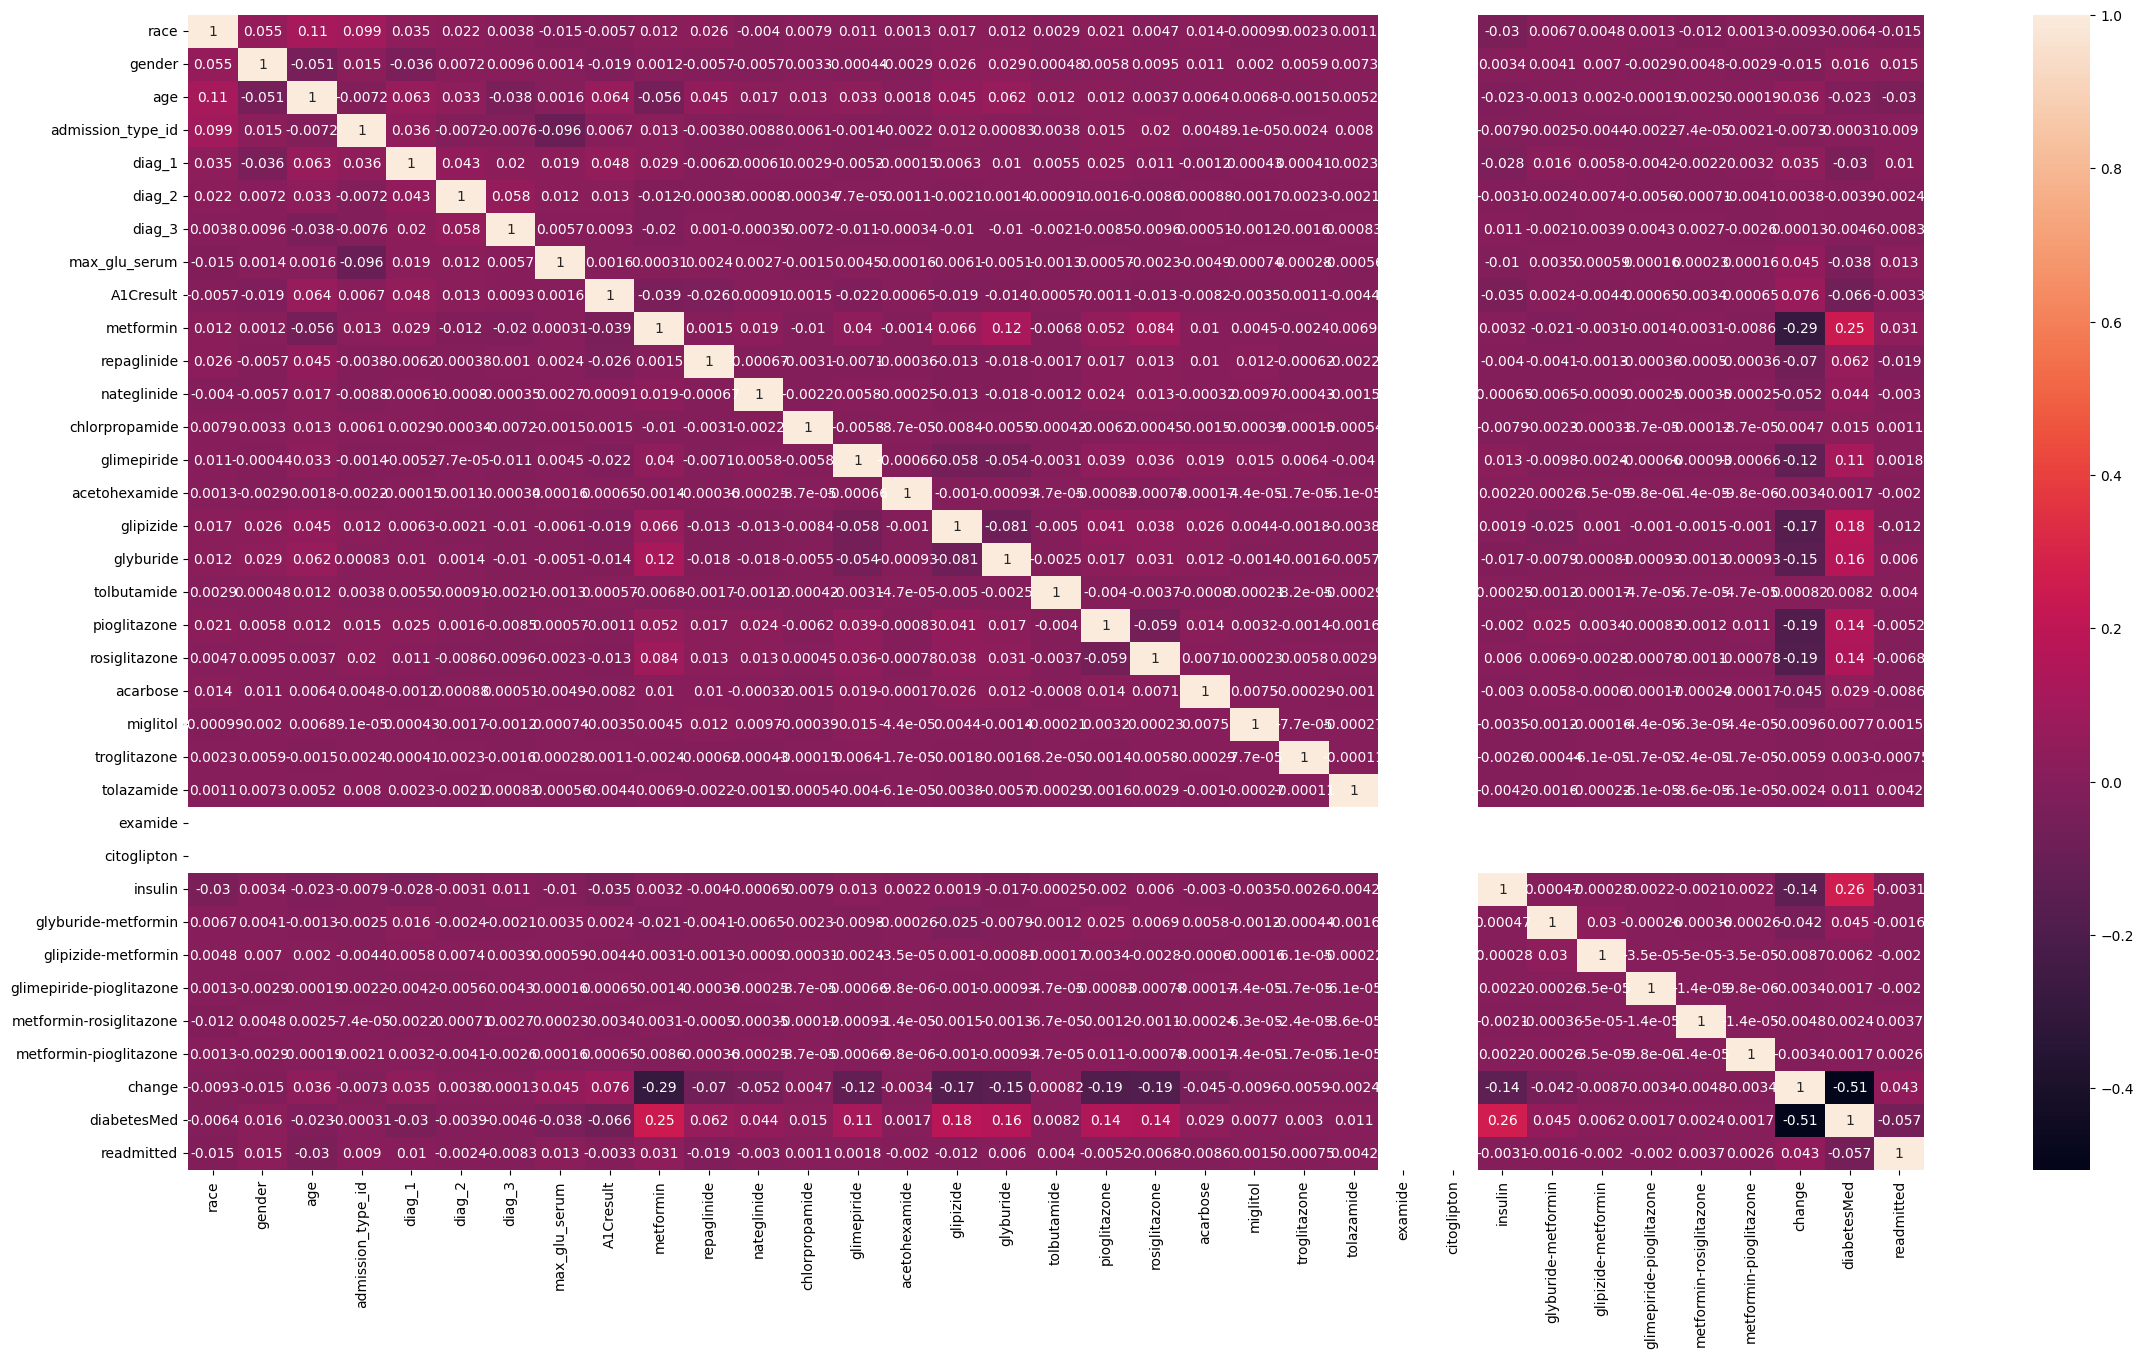

In [ ]:
#############################checking correlation of collumns to select label
# Multiple columns integer conversion

df[['race','gender','age','admission_type_id','diag_1','diag_2','diag_3','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide' ,'chlorpropamide','glimepiride' ,'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone' ,'rosiglitazone' ,'acarbose','miglitol' ,'troglitazone','tolazamide' ,'examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change' ,'diabetesMed','readmitted' ]] = df[['race','gender','age','admission_type_id','diag_1','diag_2','diag_3','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide' ,'chlorpropamide','glimepiride' ,'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone' ,'rosiglitazone' ,'acarbose','miglitol' ,'troglitazone','tolazamide' ,'examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change' ,'diabetesMed','readmitted' ]].astype(int)
# print(df.dtypes)


# corr_matrix = df.corr(numeric_only = True)
corr_matrix = df.corr()
plt.figure(figsize=(28,15))

# print(corr_matrix)
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

# selecting features to keep 

# # selecting features to keep 
# cor_target = abs(corr_matrix["readmitted"])
# relevant_features = cor_target[cor_target>0.01]
# print(relevant_features)

# # #selecting features to drop
# to_drop = cor_target[cor_target<0.1]

# to_drop_frame = to_drop.to_frame()


# row_names = to_drop_frame.index
# row_names_list = list(row_names)
# row_names_list.append('readmitted')
# y = df['readmitted'].values
# X = df.drop(row_names_list, axis=1).values



In [ ]:

y = df['readmitted'].values
df = df.drop(['readmitted'], axis = 1)
X = df.values
######################parameter selection for decision trees and data split into test and train
steps = [('scaler', StandardScaler()),
('dec_tree', DecisionTreeClassifier())]
pipeline = Pipeline(steps)

print(X)

train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2, random_state=42)

params = {"dec_tree__criterion":['gini', 'entropy'],
         "dec_tree__max_depth":np.arange(3, 15)
         }

# for cv in range(3,10):
#     cv_grid = GridSearchCV(pipeline, param_grid=params,cv=cv)
#     cv_grid.fit(train_X, train_Y)
#     print("%d fold score: %3.2f" %(cv,cv_grid.score(test_X, test_Y)))
#     print("Best parameters: ", cv_grid.best_params_)


target_dict = {
      'NO': 2,
      '>30': 1,
      '<30': 0,
}


[[3 0 0 ... 0 1 0]
 [3 0 1 ... 0 0 1]
 [1 0 2 ... 0 1 1]
 ...
 [3 1 7 ... 0 0 1]
 [3 0 8 ... 0 0 1]
 [3 1 7 ... 0 1 0]]


In [ ]:


###########################################building model decision Tree ##################################################
model = DecisionTreeClassifier(criterion="entropy", random_state=0)
X = train_X
y = train_Y

# print(X)
model.fit(X, y)

predicted_values = model.predict(test_X)
  

y_pred = predicted_values.astype(int)
y_test = test_Y

# false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)


print(y_pred)

print(y_test)


print("Decision Trees Evaluation")

print(classification_report(y_test, y_pred))
  
confusion_matrix(y_test, y_pred)




###########################ROC curve
# false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)

# print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_pred))

# plt.subplots(1, figsize=(10,10))
# plt.title('Receiver Operating Characteristic - DecisionTree')
# plt.plot(false_positive_rate1, true_positive_rate1)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

######################################building model SVC #########################################


# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf.fit(X, y)

  # # print(clf.predict(test_X))

  # predicted_values = clf.predict(test_X)

  # y_pred = predicted_values.astype(int)
  # y_test = test_Y


  # print("SVC Evaluation")

  # print(f1_score(y_test, y_pred, average='macro'))

  # print(f1_score(y_test, y_pred, average='micro'))

  # print(f1_score(y_test, y_pred, average='weighted')) 

  # print(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))




###################################building model NuSVC #########################################

  # clf = make_pipeline(StandardScaler(), NuSVC())
  # clf.fit(X, y)

  # print(clf.predict(test_X))

  # predicted_values = clf.predict(test_X)

  # output = predicted_values
  # True_Output = test_Y


  # print(f1_score(True_Output, output, average='macro'))

  # print(f1_score(True_Output, output, average='micro'))

  # print(f1_score(True_Output, output, average='weighted')) 


################################# building model LinearSVC ########################################

  # print("Linear SVC")
  # print(" ")

  # L_X = X
  # L_y = y

  # L_X, L_y = make_classification(n_features=35, random_state=0)
  # clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
  # clf.fit(L_X, L_y)

  # print(clf.named_steps['linearsvc'].coef_)

  # print(clf.named_steps['linearsvc'].intercept_)

  # predicted_values = clf.predict(test_X)

  # y_pred = predicted_values.astype(int)
  # y_test = test_Y

  # print("Linear SVC Evaluation")

  # print(f1_score(y_test, y_pred, average='macro'))

  # print(f1_score(y_test, y_pred, average='micro'))

  # print(f1_score(y_test, y_pred, average='weighted')) 

  # print(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))

[2 2 2 ... 1 1 2]
[2 2 2 ... 1 1 2]
Decision Trees Evaluation
              precision    recall  f1-score   support

           0       0.11      0.13      0.12      2285
           1       0.37      0.37      0.37      7117
           2       0.56      0.55      0.56     10952

    accuracy                           0.44     20354
   macro avg       0.35      0.35      0.35     20354
weighted avg       0.44      0.44      0.44     20354



array([[ 286,  864, 1135],
       [ 954, 2644, 3519],
       [1300, 3652, 6000]])

In [ ]:
dump(model, 'filename.joblib')

testX_df = pd.DataFrame(test_X, columns = ['race','gender','age','admission_type_id','diag_1','diag_2','diag_3','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide' ,'chlorpropamide','glimepiride' ,'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone' ,'rosiglitazone' ,'acarbose','miglitol' ,'troglitazone','tolazamide' ,'examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change' ,'diabetesMed'])

testY_df = pd.DataFrame(test_Y, columns = ['readmitted'])


testX_df.to_csv('testX.csv', index = False)
testY_df.to_csv('testY.csv', index = False)
# clf1 = load('filename.joblib')